# (Flights Evaluation in United State
## by Mohamed Asem

## Preliminary Wrangling

> This dataset contains entries about flights data including reasons of delay, flight's time, carrier, distance, origin and destination.

> All the data is happening during January 2020.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('ONTIME_REPORTING.csv')

In [3]:
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 29
0,2020,1,1,3,WN,N951WN,5888,ONT,SFO,1810,...,95.0,122.0,74.0,363.0,8.0,0.0,27.0,0.0,33.0,NaN
1,2020,1,1,3,WN,N467WN,6276,ONT,SFO,1150,...,90.0,92.0,71.0,363.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,1,1,3,WN,N7885A,4598,ONT,SJC,2020,...,70.0,68.0,57.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1,1,3,WN,N551WN,4761,ONT,SJC,1340,...,75.0,75.0,63.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,1,3,WN,N968WN,5162,ONT,SJC,915,...,80.0,67.0,57.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607346 entries, 0 to 607345
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 607346 non-null  int64  
 1   MONTH                607346 non-null  int64  
 2   DAY_OF_MONTH         607346 non-null  int64  
 3   DAY_OF_WEEK          607346 non-null  int64  
 4   OP_UNIQUE_CARRIER    607346 non-null  object 
 5   TAIL_NUM             606648 non-null  object 
 6   OP_CARRIER_FL_NUM    607346 non-null  int64  
 7   ORIGIN               607346 non-null  object 
 8   DEST                 607346 non-null  object 
 9   CRS_DEP_TIME         607346 non-null  int64  
 10  DEP_TIME             600682 non-null  float64
 11  DEP_DELAY            600647 non-null  float64
 12  TAXI_OUT             600524 non-null  float64
 13  TAXI_IN              600271 non-null  float64
 14  CRS_ARR_TIME         607346 non-null  int64  
 15  ARR_TIME         

In [5]:
df.drop(['Unnamed: 29'], axis=1, inplace=True) #dropping 'unnamed: 29' column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607346 entries, 0 to 607345
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 607346 non-null  int64  
 1   MONTH                607346 non-null  int64  
 2   DAY_OF_MONTH         607346 non-null  int64  
 3   DAY_OF_WEEK          607346 non-null  int64  
 4   OP_UNIQUE_CARRIER    607346 non-null  object 
 5   TAIL_NUM             606648 non-null  object 
 6   OP_CARRIER_FL_NUM    607346 non-null  int64  
 7   ORIGIN               607346 non-null  object 
 8   DEST                 607346 non-null  object 
 9   CRS_DEP_TIME         607346 non-null  int64  
 10  DEP_TIME             600682 non-null  float64
 11  DEP_DELAY            600647 non-null  float64
 12  TAXI_OUT             600524 non-null  float64
 13  TAXI_IN              600271 non-null  float64
 14  CRS_ARR_TIME         607346 non-null  int64  
 15  ARR_TIME         

In [7]:
df

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2020,1,1,3,WN,N951WN,5888,ONT,SFO,1810,...,0.0,95.0,122.0,74.0,363.0,8.0,0.0,27.0,0.0,33.0
1,2020,1,1,3,WN,N467WN,6276,ONT,SFO,1150,...,0.0,90.0,92.0,71.0,363.0,NaN,NaN,NaN,NaN,NaN
2,2020,1,1,3,WN,N7885A,4598,ONT,SJC,2020,...,0.0,70.0,68.0,57.0,333.0,NaN,NaN,NaN,NaN,NaN
3,2020,1,1,3,WN,N551WN,4761,ONT,SJC,1340,...,0.0,75.0,75.0,63.0,333.0,NaN,NaN,NaN,NaN,NaN
4,2020,1,1,3,WN,N968WN,5162,ONT,SJC,915,...,0.0,80.0,67.0,57.0,333.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607341,2020,1,18,6,9E,N390CA,4960,ATL,SGF,2042,...,0.0,120.0,109.0,93.0,563.0,NaN,NaN,NaN,NaN,NaN
607342,2020,1,19,7,9E,N398CA,4960,ATL,SGF,2042,...,0.0,123.0,114.0,92.0,563.0,NaN,NaN,NaN,NaN,NaN
607343,2020,1,20,1,9E,N398CA,4960,ATL,SGF,2042,...,0.0,123.0,114.0,89.0,563.0,NaN,NaN,NaN,NaN,NaN
607344,2020,1,21,2,9E,N367CA,4960,ATL,SGF,2042,...,0.0,123.0,118.0,83.0,563.0,NaN,NaN,NaN,NaN,NaN


In [8]:
df.shape

(607346, 29)

In [9]:
df.describe()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,607346.0,607346.0,607346.000000,607346.000000,607346.000000,607346.000000,600682.000000,600647.000000,600524.000000,600271.000000,...,607346.000000,607346.000000,599268.000000,599268.000000,607346.000000,82285.000000,82285.000000,82285.000000,82285.000000,82285.000000
mean,2020.0,1.0,16.014354,3.955735,2622.365261,1329.904284,1331.512559,6.181221,17.356615,7.503138,...,0.001893,144.583689,137.039345,112.187437,798.022341,24.696324,4.594944,14.262733,0.091062,20.561658
std,0.0,0.0,8.990719,1.910205,1822.545302,488.833507,497.095168,43.181905,9.622261,5.670835,...,0.043473,72.688861,72.293510,70.629553,587.282639,72.972359,39.180258,33.736783,2.308003,50.370818
min,2020.0,1.0,1.000000,1.000000,1.000000,2.000000,1.000000,-58.000000,1.000000,1.000000,...,0.000000,-77.000000,18.000000,8.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,1.0,8.000000,2.000000,1070.000000,917.000000,919.000000,-6.000000,11.000000,4.000000,...,0.000000,92.000000,84.000000,61.000000,369.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.0,1.0,16.000000,4.000000,2177.000000,1324.000000,1326.000000,-3.000000,15.000000,6.000000,...,0.000000,127.000000,120.000000,94.000000,641.000000,1.000000,0.000000,2.000000,0.000000,0.000000
75%,2020.0,1.0,24.000000,5.000000,4108.000000,1735.000000,1739.000000,2.000000,20.000000,9.000000,...,0.000000,175.000000,168.000000,142.000000,1037.000000,22.000000,0.000000,19.000000,0.000000,22.000000
max,2020.0,1.0,31.000000,7.000000,6860.000000,2359.000000,2400.000000,2489.000000,189.000000,146.000000,...,1.000000,700.000000,744.000000,698.000000,5095.000000,2489.000000,1525.000000,1408.000000,188.000000,2228.000000


### What is the structure of your dataset?

> This dataset contains 29 columns and 607346 entry

### What is/are the main feature(s) of interest in your dataset?

> The main features I am thinking about studying them are:

> Carriers.

> Cancellation code.

> Delay time variables.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> CARRIER_DELAY, DAY_OF_WEEK, DISTANCE

## Univariate Exploration


Text(0, 0.5, 'count')

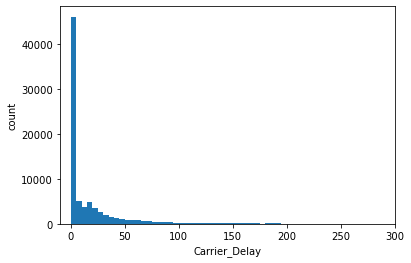

In [10]:
# Investigating the distribution of carrier delay
bins = np.arange(-10,300,5)
plt.hist(data = df, x = 'CARRIER_DELAY', bins = bins)
plt.xlim(-10,300)
plt.xlabel('Carrier_Delay')
plt.ylabel('count')

From the plot above it's obvious that the delay because of carrier is mostly distributed between 0 and 50

## What is the most common reasn for cancellation?

Text(0, 0.5, 'count')

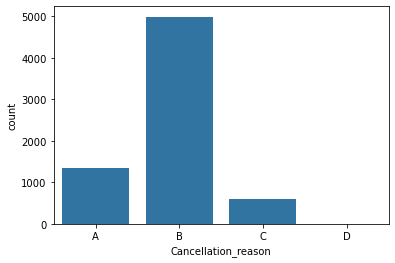

In [11]:
# Investigating the distribution of cancellation codes
base_color=sb.color_palette()[0]
g=sb.countplot(data=df,x='CANCELLATION_CODE',color=base_color,order=['A','B','C','D'])
plt.xlabel('Cancellation_reason')
plt.ylabel('count')

As seen above, Cancellation because of weather is the most common followed by carrier then NAS.

## What is the distribution of the delay variables?

Text(0, 0.5, 'count')

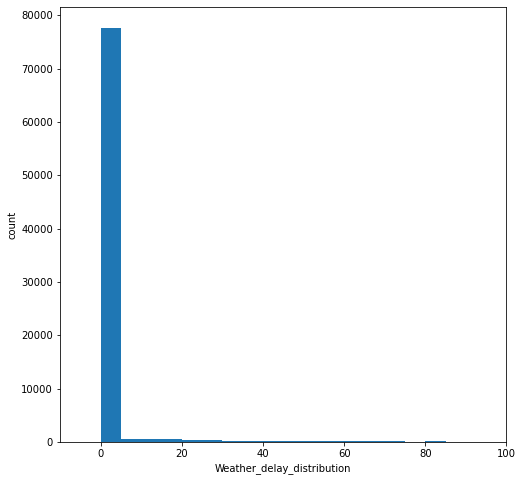

In [12]:
# Investigating the distribution of weather delay
plt.figure(figsize=(8,8))
bins = np.arange(-10,100,5)
plt.hist(data = df, x = 'WEATHER_DELAY', bins = bins)
plt.xlim(-10,100)
plt.xlabel('Weather_delay_distribution')
plt.ylabel('count')

The figure shows that weather delay is high between 0 and 5 minutes

Text(0, 0.5, 'count')

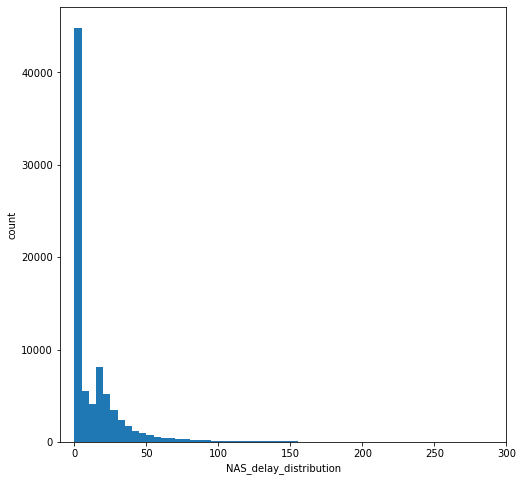

In [13]:
# Investigating the distribution of national air system delay
plt.figure(figsize=(8,8))
bins = np.arange(-10,300,5)
plt.hist(data = df, x = 'NAS_DELAY', bins = bins)
plt.xlim(-10,300)
plt.xlabel('NAS_delay_distribution')
plt.ylabel('count')

The plot is indicating that NAS delay is highly distributed between 0 and 50

Text(0, 0.5, 'count')

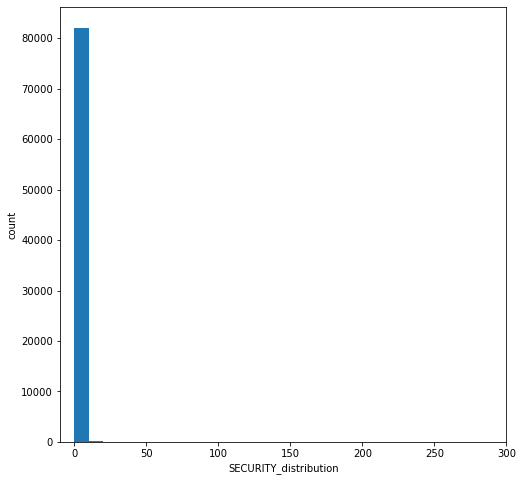

In [14]:
plt.figure(figsize=(8,8))
bins = np.arange(-10,300,10)
plt.hist(data = df, x = 'SECURITY_DELAY', bins = bins)
plt.xlim(-10,300)
plt.xlabel('SECURITY_distribution')
plt.ylabel('count')

In [15]:
df['SECURITY_DELAY'].value_counts() #looking deeper into the statistics of security delay

0.0      81989
9.0         17
15.0        14
1.0         11
4.0         11
         ...  
50.0         1
93.0         1
188.0        1
60.0         1
61.0         1
Name: SECURITY_DELAY, Length: 77, dtype: int64

The distribution of security delay is ocurred the most between 0 and 20 minutes

Text(0, 0.5, 'count')

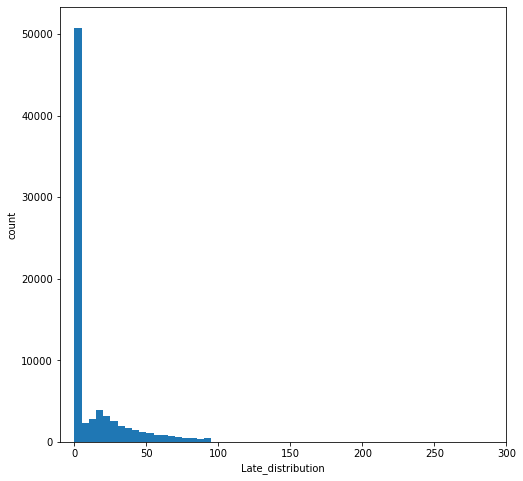

In [16]:
# Investigating the distribution of late aircraft delay
plt.figure(figsize=(8,8))
bins = np.arange(-10,100,5)
plt.hist(data = df, x = 'LATE_AIRCRAFT_DELAY', bins = bins)
plt.xlim(-10,300)
plt.xlabel('Late_distribution')
plt.ylabel('count')

Aircraft delay is the most between 0 and 100 minutes

Text(0, 0.5, 'count')

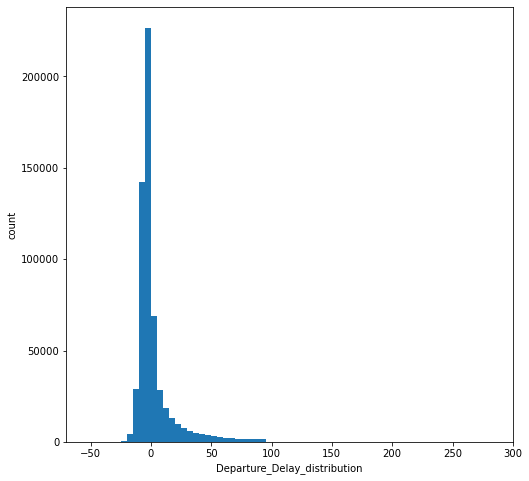

In [17]:
# Investigating the distribution of departure delay
plt.figure(figsize=(8,8))
bins = np.arange(-70,100,5)
plt.hist(data = df, x = 'DEP_DELAY', bins = bins)
plt.xlim(-70,300)
plt.xlabel('Departure_Delay_distribution')
plt.ylabel('count')

From the above figure we can easily notice that the departure delay is highly distributed between 0 and 50

Text(0, 0.5, 'count')

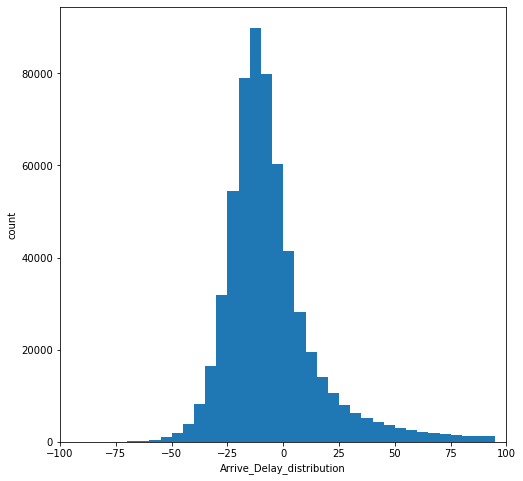

In [18]:
# Investigating the distribution of arrive delay
plt.figure(figsize=(8,8))
bins = np.arange(-70,100,5)
plt.hist(data = df, x = 'ARR_DELAY', bins = bins)
plt.xlim(-100,100)
plt.xlabel('Arrive_Delay_distribution')
plt.ylabel('count')

From the above figure we can easily notice that the arrive delay is highly distributed between -50 and 50

## What is the carrier that has most flights?

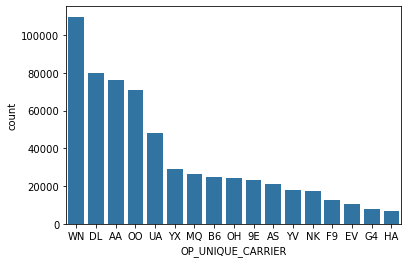

In [19]:
freq = df['OP_UNIQUE_CARRIER'].value_counts()

# Get the indexes of the Series
gen_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=df, x='OP_UNIQUE_CARRIER', color=base_color, order=gen_order);

The count plot is showing the WN (Southwest Airlines Co.) has the most flights during Jan 2020

## What are the most common destinations and origins of flights?

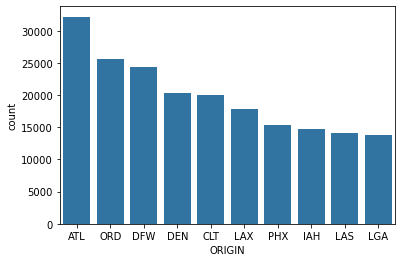

In [20]:
freq = df['ORIGIN'].value_counts()[:10]

# Get the indexes of the Series
gen_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=df, x='ORIGIN', color=base_color, order=gen_order);

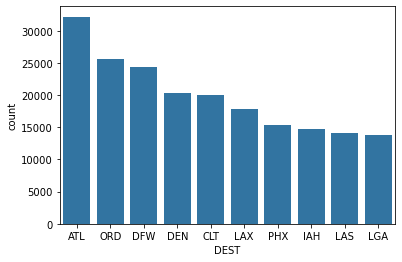

In [21]:
freq = df['DEST'].value_counts()[:10]

# Get the indexes of the Series
gen_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=df, x='DEST', color=base_color, order=gen_order);

The two plots showed that ATL is the most destination and origin of flights

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Secrity delays were the less significant variable as the most common value of these kind of delays is zero.

> The most common reason for delay is weather.

> WN (Southwest Airlines Co.) has the highest number of flights during Jan 2020

> For Delays we added limits on X-axis values to interpret the plot well.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The unusual distribution was the security delay distribution because the most entries were zero

>I deleted the entire column (Unnamed: 29) because it has 0 non-null values

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## What is the effect of day of week on carrier delay?

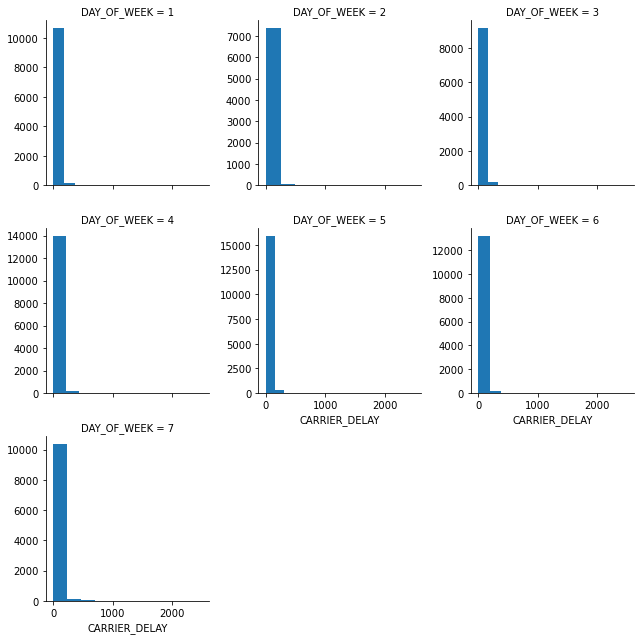

In [22]:
g = sb.FacetGrid(data = df, col = 'DAY_OF_WEEK', col_wrap=3, sharey=False)
g.map(plt.hist, 'CARRIER_DELAY');

Day of week 5 (Friday) has the most carrier delays

## What is the effect of day of week on Cancellation code?

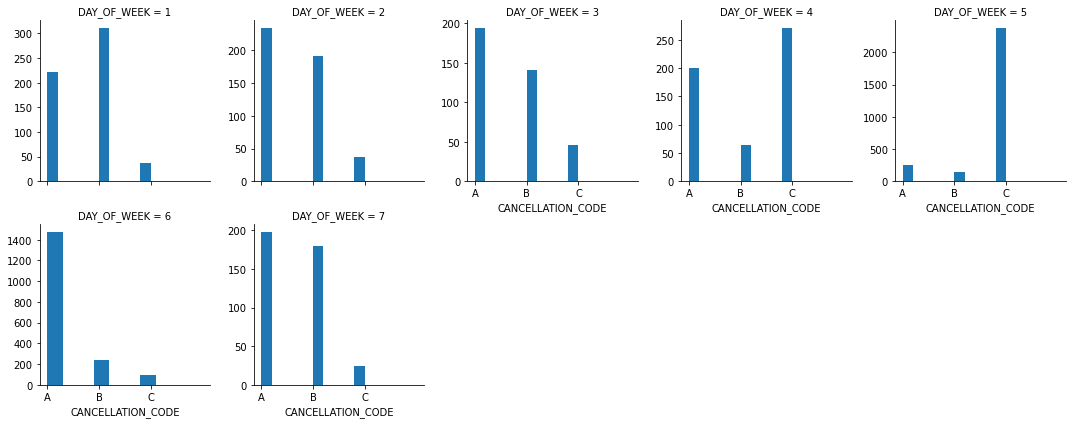

In [23]:
g = sb.FacetGrid(data = df, col = 'DAY_OF_WEEK', col_wrap=5, sharey=False)
g.map(plt.hist, 'CANCELLATION_CODE');

Cancellation because of carrier is highest on the sixth day of week while NAS cancellation is highest on fifth day

## What is the relation between carrier delay and departure delay?

Text(0, 0.5, 'Departure Delay')

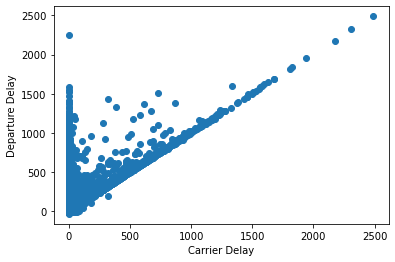

In [24]:
plt.scatter(data= df, x = 'CARRIER_DELAY', y = 'DEP_DELAY');
plt.xlabel('Carrier Delay')
plt.ylabel('Departure Delay')

There is a positive correlation between cariier delay and the departure delay.

## What is the relation between arrival delay and departure delay?

Text(0, 0.5, 'Departure Delay')

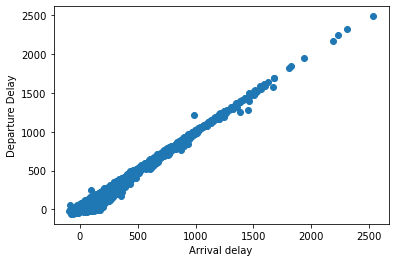

In [25]:
plt.scatter(data= df, x = 'ARR_DELAY', y = 'DEP_DELAY');
plt.xlabel('Arrival delay')
plt.ylabel('Departure Delay')

There is a strong positive correlation between arrival delay and departure delay

## What is the correlation between arrival delay and arrival time?

Text(0, 0.5, 'Arrival Time')

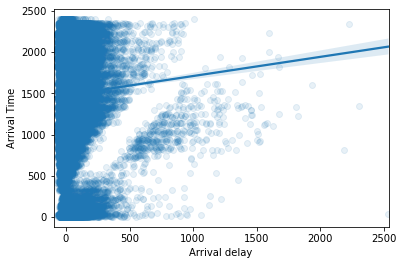

In [26]:
sb.regplot(data = df, x = 'ARR_DELAY', y = 'ARR_TIME', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=True)
plt.xlabel('Arrival delay')
plt.ylabel('Arrival Time')

There is a positive correlation between arrival delay and arrival time

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There is a positive correlation between cariier delay and the departure delay.

> There is a strong positive correlation between arrival delay and departure delay

> There is a positive correlation between arrival delay and arrival time

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Day of week 5 (Friday) has the most carrier delays

> Cancellation because of carrier is highest on the sixth day of week while NAS cancellation is highest on fifth day

## Multivariate Exploration



## How are the carrier, cancellation code and distance correlated?

<AxesSubplot:xlabel='OP_UNIQUE_CARRIER', ylabel='CANCELLATION_CODE'>

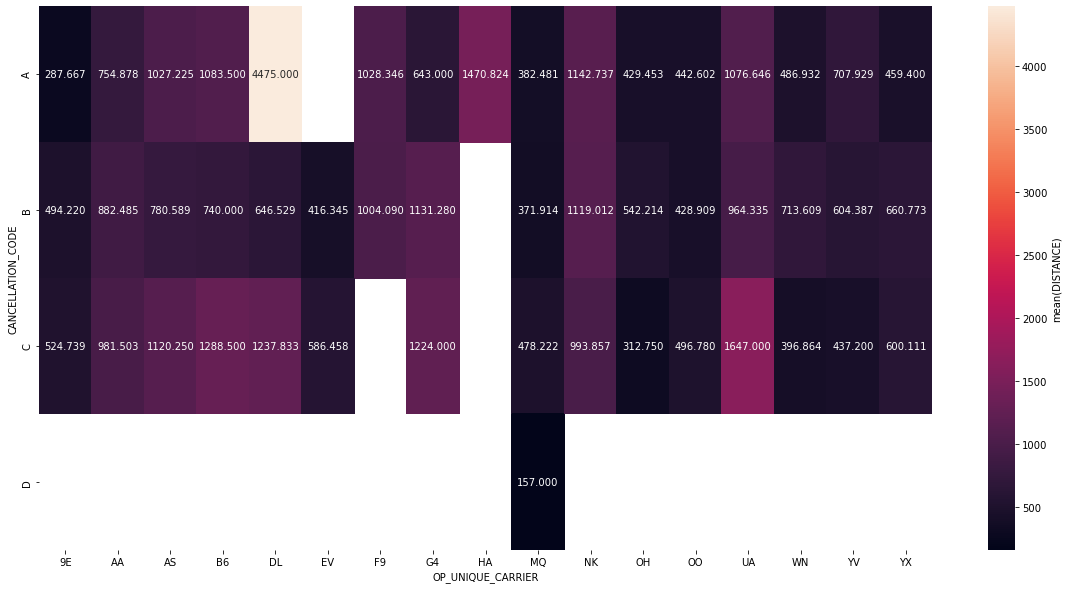

In [27]:
plt.figure(figsize=(20,10))
cat_means = df.groupby(['OP_UNIQUE_CARRIER', 'CANCELLATION_CODE']).mean()['DISTANCE']
cat_means = cat_means.reset_index(name = 'num_var2_avg')
cat_means = cat_means.pivot(index = 'CANCELLATION_CODE', columns = 'OP_UNIQUE_CARRIER',
                            values = 'num_var2_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(DISTANCE)'})

As shown, Cancellation code in general is not related to the mean distance nor the carrier so we will try to see it from other perspective in the next plot.

## What is the the relationship between cancellation code, distance and carrier?

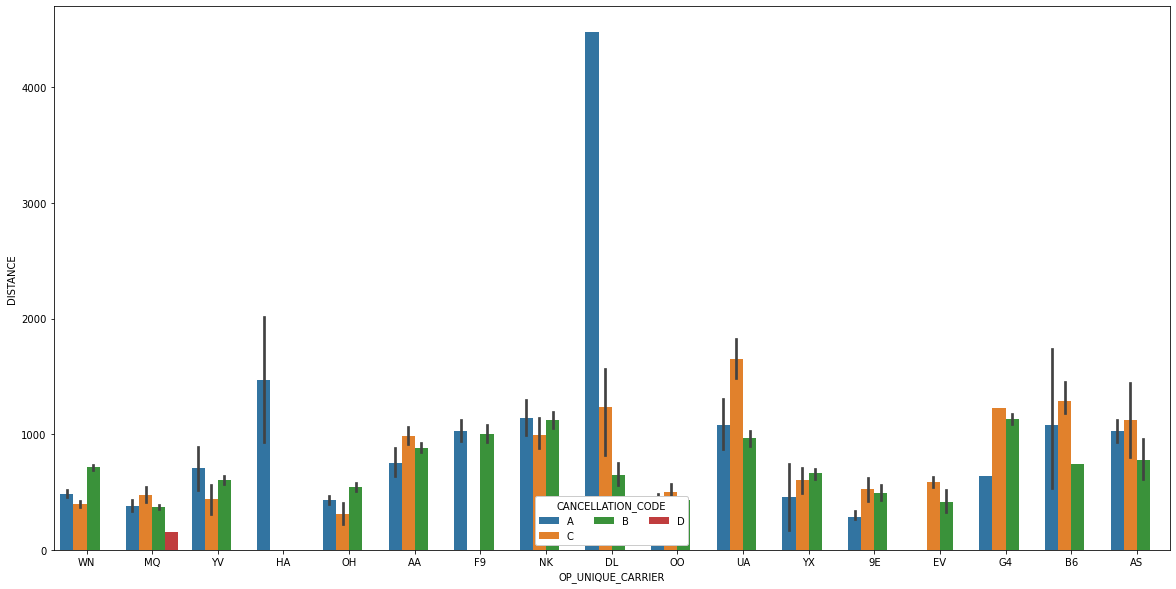

In [28]:
plt.figure(figsize=(20,10))
ax = sb.barplot(data = df, x = 'OP_UNIQUE_CARRIER', y = 'DISTANCE', hue = 'CANCELLATION_CODE')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'CANCELLATION_CODE')

When looking deep in the above figure we will notice that cancellation by carrier associated with the longest distance has been occured by DL

Weather cancellation doesn't exceed 1500 miles and the shortest distance associated with weather cancellation has been occured by MQ and OO carriers

NK has the highest distance for weather cancellation.

## How departure delay and arrival delay are correlated to carriers?

C:\Users\Mohamed Asem\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


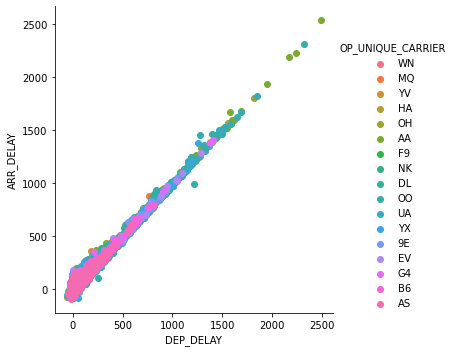

In [29]:
g = sb.FacetGrid(data = df, hue = 'OP_UNIQUE_CARRIER', size = 5)
g.map(plt.scatter, 'DEP_DELAY', 'ARR_DELAY')
g.add_legend()

As shown above departure delay and arrival delay have a positive relationship even when they are associated with different carriers

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> cancellation by carrier associated with the longest distance has been occured by DL

> Weather cancellation doesn't exceed 1500 miles and the shortest distance associated with weather cancellation has been occured by MQ and OO carriers

> NK has the highest distance for weather cancellation.

> As shown above departure delay and arrival delay have a positive relationship even when they are associated with different carriers

### Were there any interesting or surprising interactions between features?

> The main reason of cancellation for HA company which has the least number of flights was because of cancelling the flights by themselves.